In [21]:
#importando as bibliotecas necessárias
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler, MaxAbsScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, KFold

from imblearn.under_sampling import NearMiss
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report

from sklearn.metrics import accuracy_score, log_loss
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    RandomForestClassifier,
    AdaBoostClassifier,
    GradientBoostingClassifier,)

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_classification
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
import pickle

import warnings
warnings.filterwarnings("ignore")

In [10]:
#carregando o dataset para construção do modelo preditivo
df_mp= pd.read_csv('salary_f1.csv')
df_mp.sample(2)

,age,work_class,education,marital_status,occupation,race,sex,capital_gain,capital_loss,hours_per_week,native_country,annual_income
13351,18,Private,HS-grad,Never-married,Sales,White,Female,no,no,20,AmericaNorte,<=50K
8612,52,Self-emp-not-inc,Masters,Married-civ-spouse,Sales,White,Male,no,no,70,AmericaNorte,<=50K


In [11]:
df_mp.replace(' Married-civ-spouse', ' Married', inplace=True)
df_mp.replace(' Married-AF-spouse', ' Married', inplace=True)
df_mp.replace(' Married-spouse-absent', ' Married', inplace=True)
df_mp.replace(' Never-married', ' Single', inplace=True)
df_mp.replace(' Separated', ' Divorced', inplace=True)

df_mp.marital_status.value_counts()

 Married     10795
 Single       7698
 Divorced     4015
 Widowed       616
Name: marital_status, dtype: int64

In [12]:
df_mp= df_mp.drop(columns=['work_class', 'race', 'sex', 'capital_loss', 'native_country'])
df_mp.sample(2)

,age,education,marital_status,occupation,capital_gain,hours_per_week,annual_income
14200,28,Assoc-acdm,Single,Adm-clerical,no,32,<=50K
11311,41,Masters,Married,Exec-managerial,no,40,>50K


In [13]:
#Separando os dados em X e y
X = df_mp.drop('annual_income', axis = 1)
y = df_mp['annual_income']

In [22]:
#aplicando o preprocessamento ao pipeline
clf = Pipeline(
        steps=[
            ('ohe', OneHotEncoder(handle_unknown="ignore")),
            ('scaler', MaxAbsScaler()),
            ('classfier', LogisticRegression(C=0.10,  multi_class="multinomial", max_iter=10000))
        ])

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y)
X_train.shape, y_train.shape

((17343, 6), (17343,))

In [24]:
modelo = clf.fit(X_train, y_train)


print("model score: %.3f" % clf.score(X_test, y_test))

model score: 0.847


In [25]:
from sklearn import set_config

set_config(display="diagram")
modelo

Pipeline(steps=[('ohe', OneHotEncoder(handle_unknown='ignore')),
                ('scaler', MaxAbsScaler()),
                ('classfier',
                 LogisticRegression(C=0.1, max_iter=10000,
                                    multi_class='multinomial'))])

              precision    recall  f1-score   support

       <=50k       0.87      0.93      0.90      4330
        >50k       0.74      0.60      0.66      1451

    accuracy                           0.85      5781
   macro avg       0.81      0.76      0.78      5781
weighted avg       0.84      0.85      0.84      5781



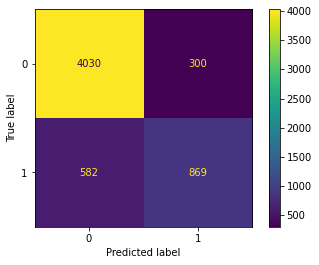

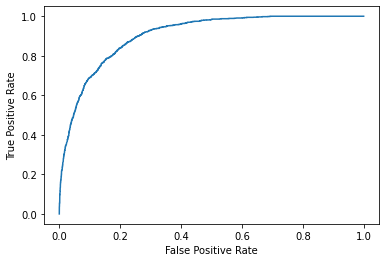

In [26]:
y_pred = modelo.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
cm_display = ConfusionMatrixDisplay(cm).plot()


from sklearn.metrics import roc_curve
from sklearn.metrics import RocCurveDisplay

y_score = modelo.decision_function(X_test)

fpr, tpr, _ = roc_curve(y_test, y_score, pos_label=clf.classes_[1])
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()


target_names = ['<=50k', '>50k']
print(classification_report(y_test, y_pred, target_names=target_names))

In [27]:
#Salvando o modelo em pickle
pickle.dump(clf,open('LR_model_OHE_MaxAbsScaler_13_05.pkl','wb'))

              precision    recall  f1-score   support

       <=50k       0.87      0.93      0.90      4330
        >50k       0.74      0.60      0.66      1451

    accuracy                           0.85      5781
   macro avg       0.81      0.76      0.78      5781
weighted avg       0.84      0.85      0.84      5781



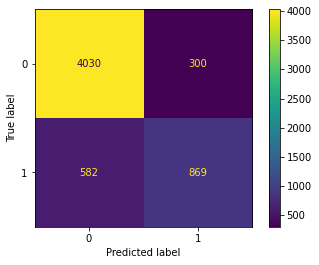

In [33]:
# Carregando o modelo e fazendo previsão com novos conjuntos de dados 
# (X_teste, Y_teste devem ser novos conjuntos de dados preparados com o procedimento de limpeza e transformação adequados)
loaded_model = pickle.load(open('LR_model_OHE_MaxAbsScaler_13_05.pkl', 'rb'))
y_pred_releitura = loaded_model.predict(X_test)
cm = confusion_matrix(y_test, y_pred_releitura)
cm_display = ConfusionMatrixDisplay(cm).plot()

target_names = ['<=50k', '>50k']
print(classification_report(y_test, y_pred_releitura, target_names=target_names))

In [35]:
X_teste = X_test.values
X_teste

array([[65, ' Some-college', ' Married', ' Exec-managerial', 'no', 40],
       [48, ' HS-grad', ' Divorced', ' Machine-op-inspct', 'no', 40],
       [50, ' HS-grad', ' Married', ' Exec-managerial', 'no', 50],
       ...,
       [51, ' HS-grad', ' Married', ' Adm-clerical', 'yes', 40],
       [47, ' HS-grad', ' Divorced', ' Transport-moving', 'no', 40],
       [40, ' Bachelors', ' Divorced', ' Sales', 'no', 40]], dtype=object)

In [37]:
resultado1 = loaded_model.predict(X_teste[80].reshape(1, -1))
resultado2 = loaded_model.predict(X_teste[100].reshape(1, -1))
print(resultado1)
print(resultado2)

[' <=50K']
[' <=50K']
